In [99]:
import numpy as np

### 3.1.3 Classification of samples that are not linearly separable

In [100]:
n = 100

# label a
mA = [5, 2]
sigma = 0.5
aX1 = np.random.normal(mA[0], sigma, n)
aX2 = np.random.normal(mA[1], sigma, n)
a = np.vstack((aX1, aX2, np.zeros(n)))
a.shape, a[:,:5]

((3, 100),
 array([[5.4515623 , 5.06317824, 4.8462062 , 5.00877015, 5.18690259],
        [2.81319956, 2.01330335, 1.85247931, 1.48290132, 2.98856168],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]))

In [101]:
# label b
mB = [10, 5]
bX1 = np.random.normal(mB[0], sigma, n)
bX2 = np.random.normal(mB[1], sigma, n)
b = np.vstack((bX1, bX2, np.ones(n)))
b.shape, b[:,:5]

((3, 100),
 array([[ 9.94535547, 10.11519036,  9.83661947,  9.49929462, 10.45703005],
        [ 5.16700179,  5.56573962,  4.44466241,  4.64034277,  5.2524904 ],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ]]))

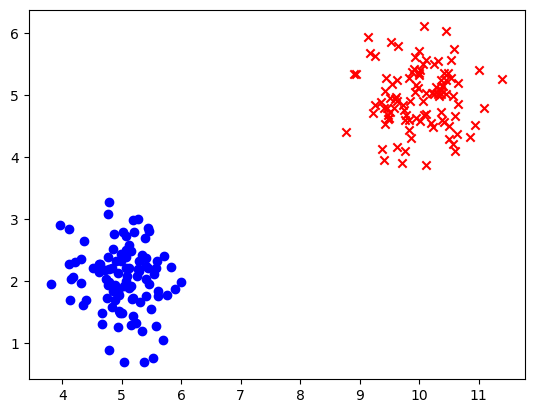

In [102]:
import matplotlib.pyplot as plt
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')

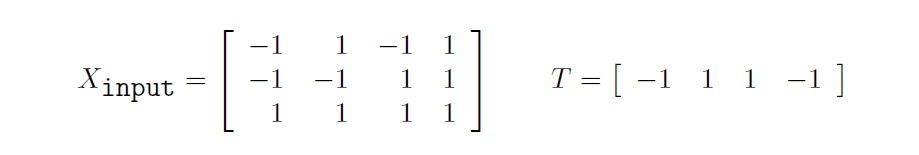

In [103]:
dataset = np.hstack((a,b))
dataset[:,:5], dataset.shape

(array([[5.4515623 , 5.06317824, 4.8462062 , 5.00877015, 5.18690259],
        [2.81319956, 2.01330335, 1.85247931, 1.48290132, 2.98856168],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]),
 (3, 200))

In [104]:
dataset

array([[ 5.4515623 ,  5.06317824,  4.8462062 ,  5.00877015,  5.18690259,
         4.98872733,  4.13500771,  5.1287127 ,  4.92859553,  5.02859528,
         5.57611261,  5.53337541,  4.40458182,  4.83906959,  4.73474984,
         4.90877733,  5.07482155,  5.57770728,  5.30468329,  5.12295808,
         5.3711106 ,  5.38652093,  3.96319629,  4.66994418,  4.31963155,
         5.08553525,  5.40894032,  4.85225163,  4.30806909,  4.77065373,
         4.98567484,  5.40023992,  5.51740738,  4.12020979,  5.14892326,
         4.93402709,  4.93724039,  5.48833388,  5.34363772,  4.63247411,
         5.44854758,  5.45959824,  4.8271894 ,  4.87140371,  5.17009202,
         5.07532294,  4.88175117,  4.17289329,  5.03655393,  5.28077524,
         5.29170776,  5.43966202,  4.88629574,  5.07142653,  4.11129529,
         4.77340506,  4.67016781,  4.79276391,  4.9572813 ,  4.61554   ,
         5.25183966,  4.95331655,  4.94256534,  5.27797747,  5.23266426,
         4.14460062,  5.17987731,  4.78486793,  5.7

In [105]:
# shuffling the dataset horizontally...
rng = np.random.default_rng()
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[ 5.14824886,  4.77340506,  5.07532294, 10.11519036, 10.06234874],
       [ 1.29178483,  1.93883156,  2.38827458,  5.56573962,  4.91299547],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  1.        ]])

In [106]:
dataset = np.vstack((np.ones(2*n), dataset))
dataset.shape, dataset[:,:5]

((4, 200),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 5.14824886,  4.77340506,  5.07532294, 10.11519036, 10.06234874],
        [ 1.29178483,  1.93883156,  2.38827458,  5.56573962,  4.91299547],
        [ 0.        ,  0.        ,  0.        ,  1.        ,  1.        ]]))

In [107]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 200), (200,))

The weights are stored in matrix W with as many columns as the dimensionality of the input patterns and with the number of rows matching the number of the
outputs (dimensionality of the output).

----------

### Part 1
Apply and compare perceptron learning and the delta rules using either batch or sequential learning mode, similarly as in the previous exercise (p.1, section 3.1.2).

**Perceptron Learning Principle**: weights are changed whenever a pattern is misclassified

In [108]:
class PerceptronLearningClassifier:
    def __init__(self, learning_rate):
        self.W = np.random.rand(3)
        self.learning_rate = learning_rate
        self.epochs = 0

    def predict(self, X):
        #print(np.array((self.W @ X) > 0, dtype=int))
        return np.array((self.W @ X) > 0, dtype=int)

    def fit(self, X, y, n_epochs, batch_size = 0):
        if (batch_size == 0):
            for i in range(0, n_epochs):
                predictions = self.predict(X)
                e = y_train - predictions
                dW = self.learning_rate * (e @ X.T)
                self.W += dW

                nErrors = np.sum( np.array(e != 0, dtype=int) )
                print("After {} epochs: {} errors".format(self.epochs, nErrors))
                self.epochs += 1
                if (nErrors == 0):
                    return True
            return False
                

    def fit_one_epoch(self, X, y):
        nErrors = 0
        for i in range(0, X.shape[1]):
            prediction = np.array((self.W @ X[:,i]) > 0, dtype=int)
            e = y[i] - prediction
            if (e != 0):
                nErrors += 1
            dW = self.learning_rate * (e * X[:,i])
            self.W = self.W + dW
        print("Errors this epoch:" + str(nErrors))

In [110]:
p1 = PerceptronLearningClassifier(0.1)

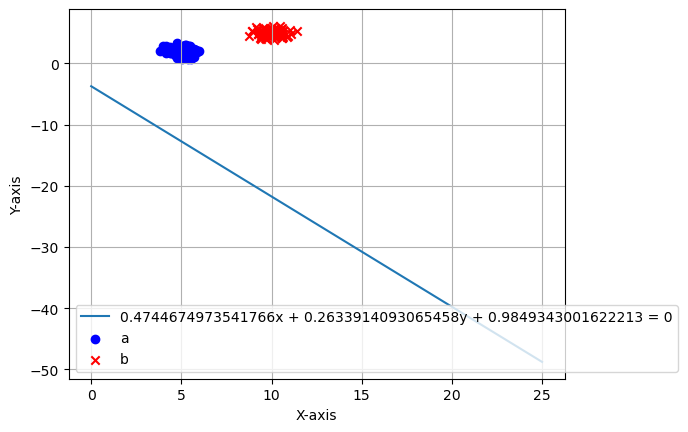

[0.9849343  0.4744675  0.26339141]


In [111]:
x = np.linspace(0, 25, 10)
a = p1.W[1]
b = p1.W[2]
c = p1.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p1.W)

After 0 epochs: 100 errors
 
After 1 epochs: 100 errors
 
After 2 epochs: 100 errors
 
After 3 epochs: 96 errors
 
After 4 epochs: 100 errors
 
After 5 epochs: 100 errors
 
After 6 epochs: 100 errors
 
After 7 epochs: 100 errors
 
After 8 epochs: 100 errors
 
After 9 epochs: 97 errors
 
After 10 epochs: 100 errors
 
After 11 epochs: 100 errors
 
After 12 epochs: 100 errors
 
After 13 epochs: 100 errors
 
After 14 epochs: 100 errors
 
After 15 epochs: 97 errors
 
After 16 epochs: 100 errors
 
After 17 epochs: 100 errors
 
After 18 epochs: 98 errors
 
After 19 epochs: 100 errors
 
After 20 epochs: 100 errors
 
After 21 epochs: 98 errors
 
After 22 epochs: 100 errors
 
After 23 epochs: 100 errors
 
After 24 epochs: 98 errors
 
After 25 epochs: 100 errors
 
After 26 epochs: 100 errors
 
After 27 epochs: 98 errors
 
After 28 epochs: 100 errors
 
After 29 epochs: 100 errors
 
After 30 epochs: 98 errors
 
After 31 epochs: 100 errors
 
After 32 epochs: 100 errors
 
After 33 epochs: 98 errors
 

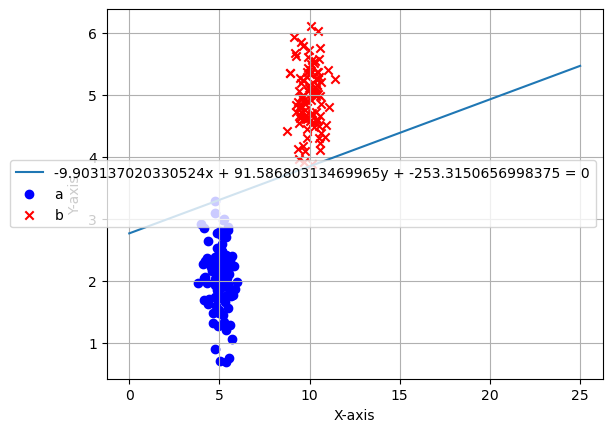

[-253.3150657    -9.90313702   91.58680313]


In [112]:
while (p1.fit(X_train, y_train, 1) == False):
    print(" ")


x = np.linspace(0, 25, 10)
a = p1.W[1]
b = p1.W[2]
c = p1.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p1.W)

------------